# Elements of Convex Optimization 2025 - Project

### Solution author: <Mikołaj Nowak, 151813>

This notebook uses helper classes and functions defined in [eco_project_helpers](eco_project_helpers) file, but there is no need to look at it.

This project requires **numpy**, **matplotlib**, **seaborn** and **[autograd](https://github.com/HIPS/autograd)** libraries.

In [1]:
!pip install numpy matplotlib seaborn autograd

## Task

The task is to implement an optimization algorithm that can deal with non-convex, multi-modal functions that are differentiable and smooth over the entire domain. Functions can have a varying number of arguments (more than 2). The quality of the solution is measured by the success rate of finding the global minimum of the function in a given budget of function (or gradient/Hessian) evaluations. The final grade from the project will be calculated as: 
```
success rate on all tests / min(success rate of the best submitted solution, 0.9). 
```
The best solutions will be awarded with bonus points (+10 bonus percent points to the final grade for the best solution and +5 bonus percent points for the runner-up).

## Benchmark functions

Below, you can find a few example benchmark functions. 
Please be aware that the final evaluation functions, which may have more than two arguments, could be more complex than the examples provided. These examples are a good starting point for testing your solution.

--------------------
Function 0: Adjiman
Dimensions: 2
Bounds: ([-1.0, 2.0], [-1.0, 1.0])


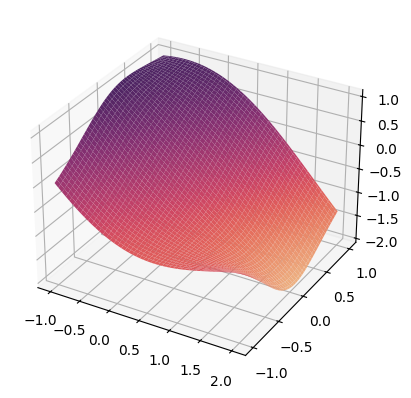

--------------------
Function 1: Alpine02
Dimensions: 2
Bounds: [(0.001, 9.999), (0.001, 9.999)]


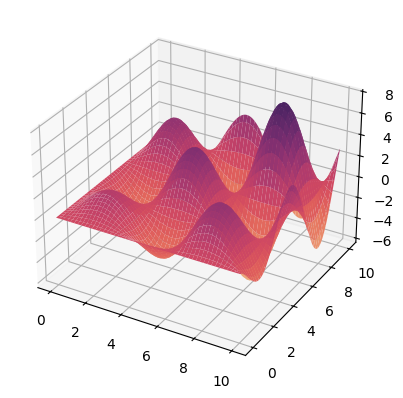

--------------------
Function 2: Brent
Dimensions: 2
Bounds: [(-10.0, 10.0), (-10.0, 10.0)]


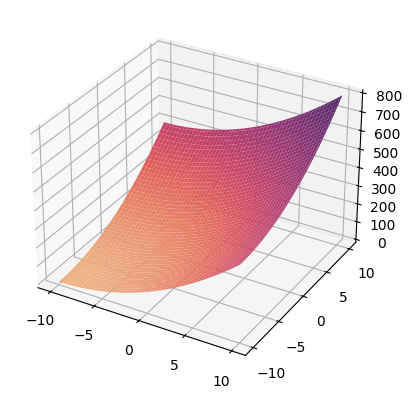

--------------------
Function 3: Bird
Dimensions: 2
Bounds: [(-6.283185307179586, 6.283185307179586), (-6.283185307179586, 6.283185307179586)]


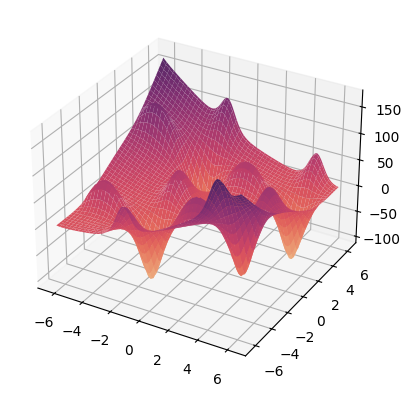

--------------------
Function 4: GoldsteinPrice
Dimensions: 2
Bounds: [(-2.0, 2.0), (-2.0, 2.0)]


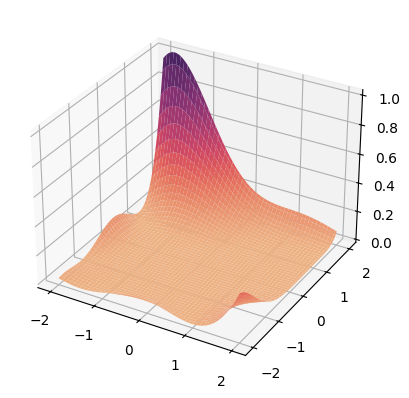

--------------------
Function 5: Hosaki
Dimensions: 2
Bounds: ([0.0, 5.0], [0.0, 6.0])


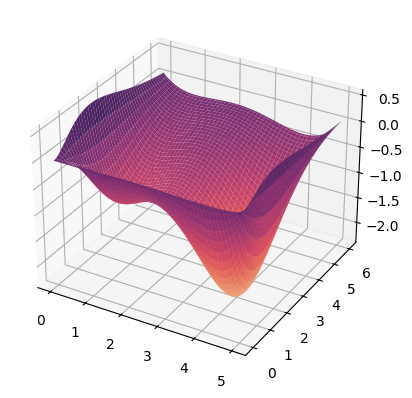

--------------------
Function 6: Keane
Dimensions: 2
Bounds: [(0.001, 9.999), (0.001, 9.999)]


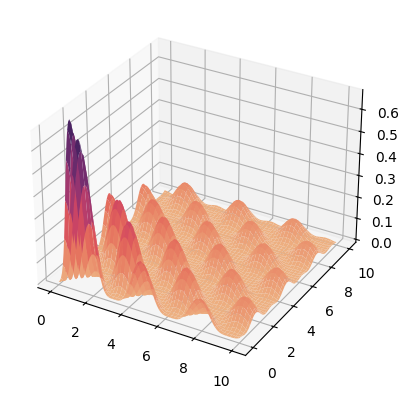

--------------------
Function 7: Levy03_2D
Dimensions: 2
Bounds: [(-10.0, 10.0), (-10.0, 10.0)]


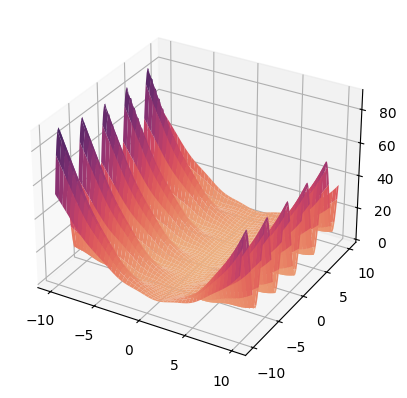

--------------------
Function 8: Levy03_3D
Dimensions: 3
Bounds: [(-10.0, 10.0), (-10.0, 10.0), (-10.0, 10.0)]
Function Levy03_3D is not 2D, skipping plot.
--------------------
Function 9: Levy03_4D
Dimensions: 4
Bounds: [(-10.0, 10.0), (-10.0, 10.0), (-10.0, 10.0), (-10.0, 10.0)]
Function Levy03_4D is not 2D, skipping plot.
--------------------
Function 10: Qing_2D
Dimensions: 2
Bounds: [(-500.0, 500.0), (-500.0, 500.0)]


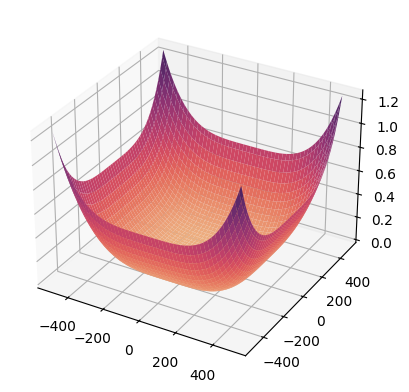

--------------------
Function 11: Qing_3D
Dimensions: 3
Bounds: [(-500.0, 500.0), (-500.0, 500.0), (-500.0, 500.0)]
Function Qing_3D is not 2D, skipping plot.
--------------------
Function 12: Qing_4D
Dimensions: 4
Bounds: [(-500.0, 500.0), (-500.0, 500.0), (-500.0, 500.0), (-500.0, 500.0)]
Function Qing_4D is not 2D, skipping plot.
--------------------
Function 13: Ripple25
Dimensions: 2
Bounds: [(0.0, 1.0), (0.0, 1.0)]


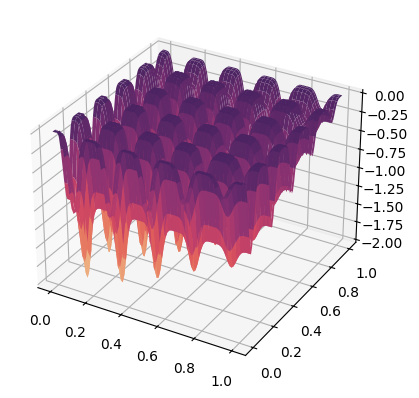

--------------------
Function 14: Schwefel22_2D
Dimensions: 2
Bounds: [(-100.0, 100.0), (-100.0, 100.0)]


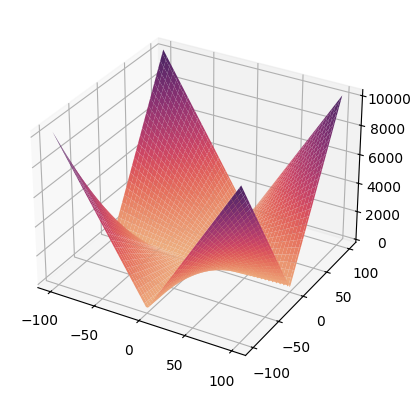

--------------------
Function 15: Schwefel22_3D
Dimensions: 3
Bounds: [(-100.0, 100.0), (-100.0, 100.0), (-100.0, 100.0)]
Function Schwefel22_3D is not 2D, skipping plot.
--------------------
Function 16: Schwefel22_4D
Dimensions: 4
Bounds: [(-100.0, 100.0), (-100.0, 100.0), (-100.0, 100.0), (-100.0, 100.0)]
Function Schwefel22_4D is not 2D, skipping plot.
--------------------
Function 17: StyblinskiTang_2D
Dimensions: 2
Bounds: [(-5.0, 5.0), (-5.0, 5.0)]


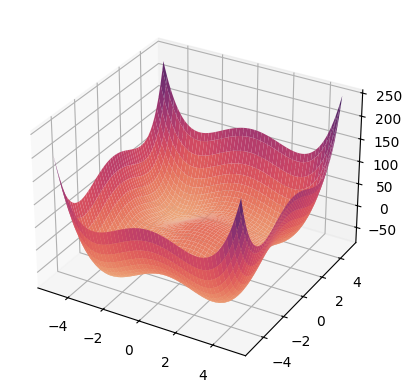

--------------------
Function 18: StyblinskiTang_3D
Dimensions: 3
Bounds: [(-5.0, 5.0), (-5.0, 5.0), (-5.0, 5.0)]
Function StyblinskiTang_3D is not 2D, skipping plot.
--------------------
Function 19: StyblinskiTang_4D
Dimensions: 4
Bounds: [(-5.0, 5.0), (-5.0, 5.0), (-5.0, 5.0), (-5.0, 5.0)]
Function StyblinskiTang_4D is not 2D, skipping plot.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from eco_project_helpers import BENCHMARK_FUNCTIONS, BenchmarkFunction


def plot_function_2d(f: BenchmarkFunction):
    if f.N == 2: # Plot only if function is 2D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        x = np.linspace(f.bounds[0][0], f.bounds[0][1], 100)
        y = np.linspace(f.bounds[1][0], f.bounds[1][1], 100)
        X, Y = np.meshgrid(x, y)
        Z = np.array([[f.func(np.array([x, y])) for x, y in zip(x, y)] for x, y in zip(X, Y)])
        ax.plot_surface(X, Y, Z, cmap=sns.color_palette("flare", as_cmap=True))
        plt.show()
    else:
        print(f"Function {f.__class__.__name__} is not 2D, skipping plot.")


def check_grad_and_hessian(f: BenchmarkFunction):
    grid = [np.linspace(bound[0], bound[1], 10) for bound in f.bounds]
    mesh = np.meshgrid(*grid)
    points = np.stack([m.flatten() for m in mesh], axis=-1)
    for x in points:
        grad = f.grad(x)
        H = f.hess(x)
        if np.isnan(grad).any() or np.isnan(H).any():
            print(f"NaN gradient or Hessian at {x}")
            return


for i, func_class in enumerate(BENCHMARK_FUNCTIONS):
    f = func_class(budget=None)
    print("--------------------")
    print(f"Function {i}: {f.__class__.__name__}")
    print(f"Dimensions: {f.N}")
    print(f"Bounds: {f.bounds}")
    plot_function_2d(f)
    check_grad_and_hessian(f) # This may take some time

## Example implementations of naive solutions

In [3]:
def random_sampling(f: BenchmarkFunction):
    best_val = np.inf
    best_x = None
    while f.budget_left:
        x = np.random.uniform(f.xmin, f.xmax)
        val = f.func(x)

        if val < best_val:
            best_val = val
            best_x = x

    return best_x


def naive_gradient_descent(f: BenchmarkFunction):
    start_learnign_rate = 0.1
    x = np.random.uniform(f.xmin, f.xmax) # Random initial point
    budget = f.budget_left
    for i in range(budget):
        lr = start_learnign_rate * (budget - i) / budget # Linearly decrease learning rate
        grad = f.grad(x)
        new_x = x - lr * grad

        # Only move to new point if it is within bounds
        if np.all(new_x >= f.xmin) and np.all(new_x <= f.xmax):
            x = new_x

    return x

## Evaluation

Your solution will be evaluated similarly to the code below. The evaluation will be done on a set of benchmark functions that are not presented here (but some will be only minor modifications of those presented here). 
The x returned by the function will be compared to the global minimum of the function. The returned x will be considered the global minimum if the value of the function in x is less than 1e-5, then the value of the global minimum.
The functions will be evaluted using 4 different budgets: 2000, 1000, 500, and 100.

In [4]:
from typing import Callable, List, Union

def eval_optimization_method(
        opt_f: Callable[[BenchmarkFunction], np.ndarray], 
        benchmarks: List[BenchmarkFunction], 
        budget: Union[List[int], int] = 1000, 
        repetitions: int = 10               
    ):
    success_rates = []
    if isinstance(budget, int):
        budget = [budget]
    for b in budget:
        for func_class in benchmarks:
            success_rate = 0
            for _ in range(repetitions):
                f = func_class(budget=b)
                x = opt_f(f)
                if f.success(x):
                    success_rate += 1
            success_rate /= repetitions
            success_rates.append(success_rate)
            print(f"Success rate of {opt_f.__name__}({f.__class__.__name__}(budget={b})) = {success_rate:.3f}")
    print(f"===\nMean success rate of {opt_f.__name__}: {np.mean(success_rates):.3f}")

eval_optimization_method(random_sampling, BENCHMARK_FUNCTIONS, budget=1000)
eval_optimization_method(naive_gradient_descent, BENCHMARK_FUNCTIONS, budget=1000)

Success rate of random_sampling(Adjiman(budget=1000)) = 0.000
Success rate of random_sampling(Alpine02(budget=1000)) = 0.000
Success rate of random_sampling(Brent(budget=1000)) = 0.000
Success rate of random_sampling(Bird(budget=1000)) = 0.000
Success rate of random_sampling(GoldsteinPrice(budget=1000)) = 0.000
Success rate of random_sampling(Hosaki(budget=1000)) = 0.000
Success rate of random_sampling(Keane(budget=1000)) = 1.000
Success rate of random_sampling(Levy03_2D(budget=1000)) = 0.000
Success rate of random_sampling(Levy03_3D(budget=1000)) = 0.000
Success rate of random_sampling(Levy03_4D(budget=1000)) = 0.000
Success rate of random_sampling(Qing_2D(budget=1000)) = 0.000
Success rate of random_sampling(Qing_3D(budget=1000)) = 0.000
Success rate of random_sampling(Qing_4D(budget=1000)) = 0.000
Success rate of random_sampling(Ripple25(budget=1000)) = 0.000
Success rate of random_sampling(Schwefel22_2D(budget=1000)) = 0.000
Success rate of random_sampling(Schwefel22_3D(budget=1000

## Your solution

Implement your solution below. DO NOT change the name of the function, and DO NOT add positional arguments to it (keyword arguments with default values are ok), as it will be graded and evaluated automatically.

In [5]:
def my_global_optimization_algorithm(f: BenchmarkFunction):
    dim = f.N
    best_result = None
    best_value = float('inf')

    while f.budget_left:
        # Sample a random point within bounds
        x = np.random.uniform(f.xmin, f.xmax)
        if not f.budget_left:
            break

        if not f.budget_left:
            break
        val = f.func(x)
        if val < best_value:
            best_result = x.copy()
            best_value = val

        if not f.budget_left:
            break
        prev_val = val

        # Start local optimization from this point
        while f.budget_left:
            if not f.budget_left:
                break

            if not f.budget_left:
                break
            grad = f.grad(x)
            if np.linalg.norm(grad) < 1e-6:
                break  # Converged

            try:
                if not f.budget_left:
                    break
                H = f.hess(x)
                H += 1e-6 * np.eye(dim)  # Regularize

                step = np.linalg.solve(H, -grad)
                new_x = x + step
                new_x = np.clip(new_x, f.xmin, f.xmax)

            except np.linalg.LinAlgError:
                if not f.budget_left:
                    break
                # Fall back to small gradient descent
                new_x = x - 0.01 * grad
                new_x = np.clip(new_x, f.xmin, f.xmax)

            if not f.budget_left:
                break
            new_val = f.func(new_x)
            improvement = prev_val - new_val

            if improvement < -1e-6:
                break
            if improvement < 1e-6:
                break  # No significant progress

            x = new_x
            prev_val = new_val

            if new_val < best_value:
                best_value = new_val
                best_result = x.copy()

    return best_result

Tips: 
- Check how your function performs on the all benchmark functions and all budgets, i.e. 100, 500, 1000, 2000. 
- Use a large number of repetitions to get a better estimate of the success rate of your solution, e.g. 100 or 1000.
- If your method have hyperparameters, tune them on the available functions.

In [6]:
eval_optimization_method(my_global_optimization_algorithm, BENCHMARK_FUNCTIONS, budget=[2000, 1000, 500, 100], repetitions=3)

Success rate of my_global_optimization_algorithm(Adjiman(budget=2000)) = 0.000
Success rate of my_global_optimization_algorithm(Alpine02(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Brent(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Bird(budget=2000)) = 0.667
Success rate of my_global_optimization_algorithm(GoldsteinPrice(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Hosaki(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Keane(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Levy03_2D(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Levy03_3D(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Levy03_4D(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Qing_2D(budget=2000)) = 1.000
Success rate of my_global_optimization_algorithm(Qing_3D(budget=2000)) = 1.000
Success rate of my_global_optimization_algorit